In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn import metrics

# Loading Dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"

In [ ]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url, names=['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11',
                          'X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22',
                          'X23','X24','X25','X26','X27','X28','X29','X30','X31','X32','X33','X34',
                          'X35','X36','X37','X38','X39','X40','X41','X42','X43','X44','X45','X46','X47',
                          'X48','X49','X50','X51','X52','X53','X54','X55','X56','X57','X58','X59','Target'])

In [ ]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X51,X52,X53,X54,X55,X56,X57,X58,X59,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# Standardize the Data

PCA is effected by scale so I have to scale the features in the data before applying the PCA. I have used StandardScaler to standardize the dataset’s features onto unit scale.

In [ ]:
features = ['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11',
            'X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22',
            'X23','X24','X25','X26','X27','X28','X29','X30','X31','X32','X33','X34',
            'X35','X36','X37','X38','X39','X40','X41','X42','X43','X44','X45','X46','X47',
            'X48','X49','X50','X51','X52','X53','X54','X55','X56','X57','X58','X59']
x = df.loc[:, features].values

In [ ]:
y = df.loc[:,['Target']].values

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
pd.DataFrame(data = x, columns = features).head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,-1.065875,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,...,0.670411,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,...,-0.039129,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375


In [ ]:
pd.DataFrame(data = x, columns = features).head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,-1.065875,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,...,0.670411,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,...,-0.039129,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375


# 2D PCA (Principal Components Analysis)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['First Principal Component', 'Second Principal Component'])

In [ ]:
principalDf.head(5)

,First Principal Component,Second Principal Component
0,1.921168,-1.370893
1,-0.480125,7.586388
2,3.859228,6.439860
3,4.597419,-3.104089
4,-0.533868,1.849847


In [ ]:
df[['Target']].head()

,Target
0,R
1,R
2,R
3,R
4,R


In [ ]:
# Concatenating DataFrame (finalDf is the final DataFrame before plotting the data)
finalDf = pd.concat([principalDf, df[['Target']]], axis = 1)
finalDf.head(5)

,First Principal Component,Second Principal Component,Target
0,1.921168,-1.370893,R
1,-0.480125,7.586388,R
2,3.859228,6.439860,R
3,4.597419,-3.104089,R
4,-0.533868,1.849847,R


# Visualization

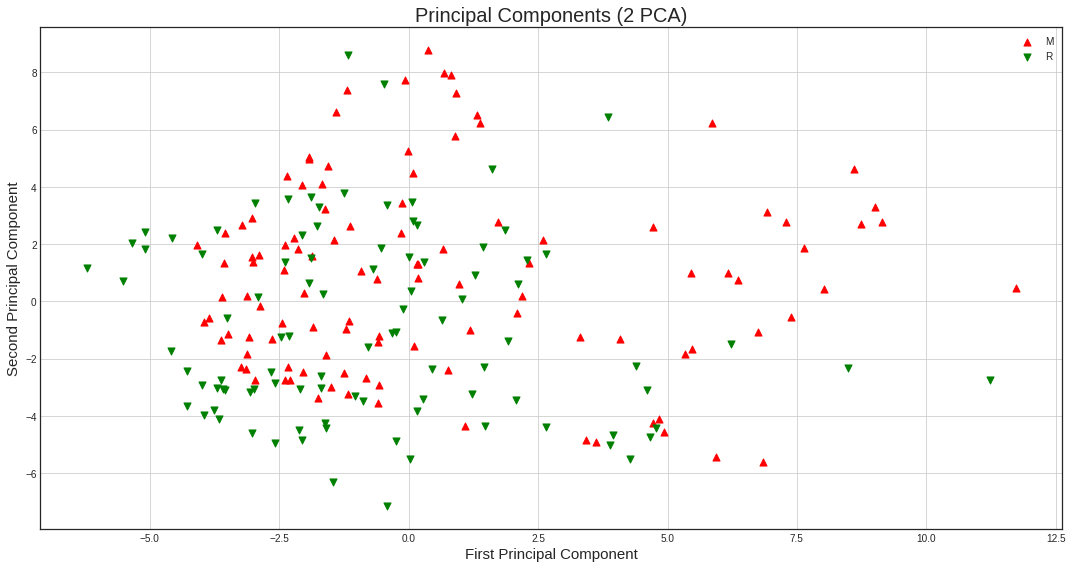

In [ ]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component', fontsize = 15)
ax.set_ylabel('Second Principal Component', fontsize = 15)
ax.set_title('Principal Components (2 PCA)', fontsize = 20)


targets = ['M', 'R']
colors = ['r', 'g']
markers= ['^', 'v']
for target, color, m in zip(targets,colors,markers):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'First Principal Component']
               , finalDf.loc[indicesToKeep, 'Second Principal Component']
               , c = color
               , marker=m
               , s= 50)
               
ax.legend(targets)
ax.grid()

# Explained Variance

The explained variance means how much information or variances can be attributed to each of the principal components.

In [ ]:
pca.explained_variance_ratio_

array([0.20346557, 0.18897216])

In [ ]:
print(pca.explained_variance_ratio_)

[0.20346557 0.18897216]


# KMeans

Reference: https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/ 

In [ ]:
# importing k-mean
from sklearn.cluster import KMeans

# k value assigned to 2
kmeans = KMeans(n_clusters=2, max_iter=100, init='random')

# fitting the values
y_kmeans = kmeans.fit_predict(x)

# Cluster centers
kmeans.cluster_centers_

# printing the value of inertia
print (kmeans.inertia_)

10650.089462606498


# KMeans Vizualization

Reference https://www.naftaliharris.com/blog/visualizing-k-means-clustering/ 

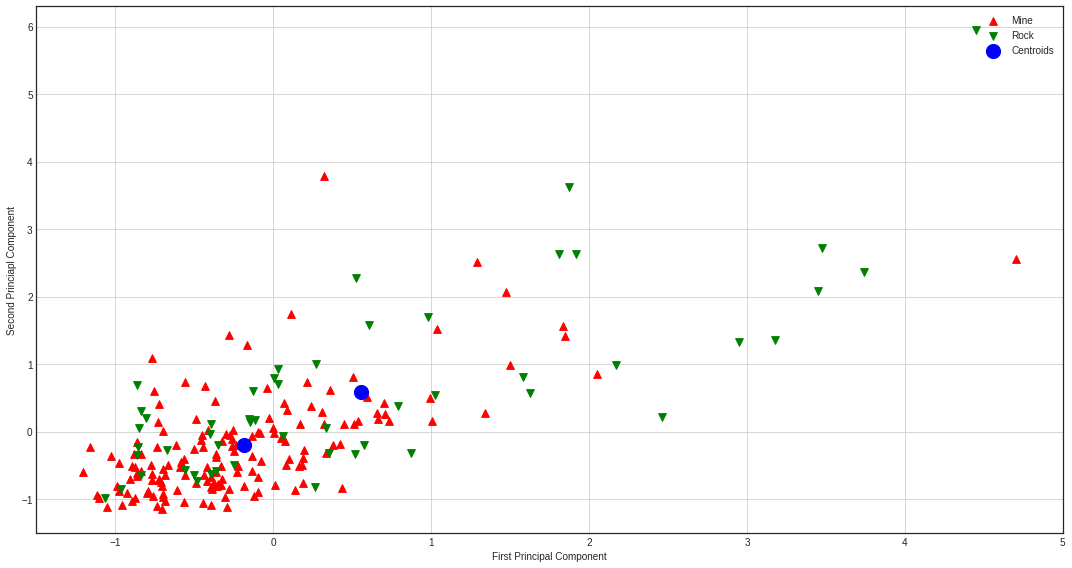

In [ ]:
fig = plt.figure(figsize = (15,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 60, c = 'red', marker ='^', label = 'Mine')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 60, c = 'green', marker ='v', label = 'Rock')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 200, c = 'blue', label = 'Centroids')
plt.xlabel('First Principal Component') 
plt.ylabel('Second Princiapl Component') 
plt.legend() 
plt.grid()
plt.show()

In [ ]:
df['Target'] = df['Target'].map({'M':0, 'R':1})

In [ ]:
# spliting into X (features) and y (target label)
X = df.iloc[:, 1:]
y = df['Target']

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
# Incremental Principal Component Analysis to select 2 features such that they explain as much variance as possible
from sklearn.decomposition import IncrementalPCA
pca = IncrementalPCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# k-Means Clustering with 2 clusters as there are 2 labels
model = KMeans(n_clusters=2, max_iter=100, init='random').fit(X_pca)
y_cluster = model.predict(X_pca)

In [ ]:
from sklearn import metrics

In [ ]:
print('Accuracy of the Model: ', metrics.accuracy_score(y, y_cluster))
print()

print('Precision of the Model: ', metrics.precision_score(y, y_cluster))
print()

print('Recall of the Model: ', metrics.recall_score(y, y_cluster))
print()

print('F1-Score of the Model: ', metrics.f1_score(y, y_cluster))
print()

Accuracy of the Model:  0.5288461538461539

Precision of the Model:  0.4968152866242038

Recall of the Model:  0.8041237113402062

F1-Score of the Model:  0.6141732283464567



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'marker'


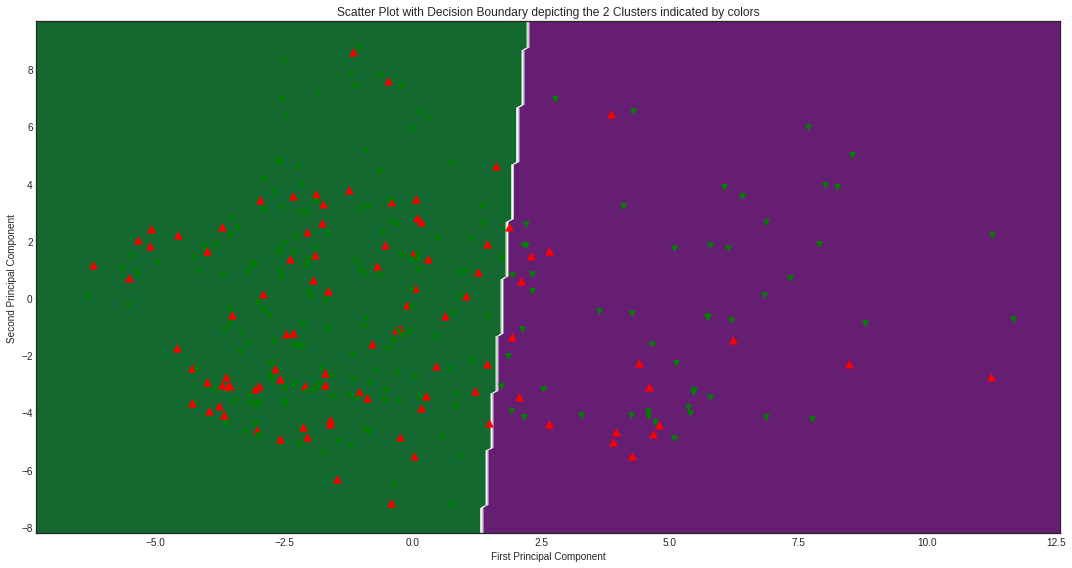

In [ ]:
# plotting the decision boundary in the scatter plot of the 2 Principal Components with labels indicated by colors
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize = (15,8))

targets = ['M', 'R']
colors = ['g', 'r']
markers= ['v', '^']


for target, color, m in zip(targets,colors,markers):
    indicesToKeep = finalDf['Target'] == target
    plt.scatter(X_pca[:, 0],X_pca[:, 1], c=y, s = 30, edgecolor = 'k',cmap = 'PRGn')
    plt.contourf(xx, yy, Z, cmap = 'PRGn', marker="v")
    plt.scatter(finalDf.loc[indicesToKeep, 'First Principal Component'] , finalDf.loc[indicesToKeep, 'Second Principal Component'], c =color, marker='^', s= 50)
    plt.scatter(X_pca[:, 0],X_pca[:, 1], c='g', s = 30, cmap = 'PRGn', marker ='v')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Scatter Plot with Decision Boundary depicting the 2 Clusters indicated by colors')
    ax.grid()
    ax.legend(targets)